We will sample two seperate locations with random data in effort to simulate a predictive algorithm on parking wait times for the future when the data becomes available.

NYC has mean 15-20, low 5 high as 60
We know that New York City has an average wait time of approximately 17 minutes, with a bit of standard deviation. We'll simplify to $\mu_{NYC} = 17$ and $\sigma_{NYC} = 5$

Let's generate some random data points with this in mind.

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [155]:
NYC_mu = 17
NYC_sigma = 5
N = 10000
NYC_times = np.random.normal(NYC_mu, NYC_sigma,N)

We create a normal distribution with 10,000 sample points of parking search time in NYC. Each will associate with a coordinate set. We graph below with 40 bins, approximately 1 per minute.

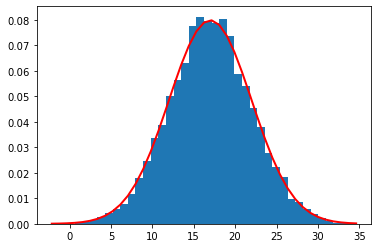

In [156]:
count, bins, ignored = plt.hist(NYC_times, 40, density=True)
plt.plot(bins, 1/(NYC_sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - NYC_mu)**2 / (2 * NYC_sigma**2) ),
        linewidth=2, color='r')
plt.show()

In [157]:
NYC_time_df = pd.DataFrame(NYC_times, columns = ['waiting time'])

In [158]:
NYC_time_df.head()

,waiting time
0,14.846623
1,17.230997
2,20.792432
3,9.591650
4,15.292918


Now let's generate the coordinates from lat: [-74.000702, -73.781132] and lng: [40.583828, 40.867068]. These are approximate coordinates of what NYC is constrained in.

In [159]:
NYC_lat_min = -74.000702
NYC_lat_max = -73.781132
NYC_lng_min = 40.583828
NYC_lng_max = 40.867068

In [160]:
NYC_lat_data = np.random.uniform(low=NYC_lat_min, high=NYC_lat_max, size=(N,))
NYC_lng_data = np.random.uniform(low=NYC_lng_min, high=NYC_lng_max, size=(N,))

In [161]:
NYC_lat_df = pd.DataFrame(NYC_lat_data, columns = ['latitude'])
NYC_lng_df = pd.DataFrame(NYC_lng_data, columns = ['longitude'])

In [162]:
NYC_lat_df.head()

,latitude
0,-73.870010
1,-73.892297
2,-73.866596
3,-73.874017
4,-73.785502


In [163]:
NYC_lng_df.head()

,longitude
0,40.865672
1,40.690721
2,40.807726
3,40.779291
4,40.667577


In [164]:
NYC_pd = pd.concat([NYC_time_df, NYC_lat_df, NYC_lng_df], axis=1)

We combine it all into one dataframe of 10,000 random samples to play with.

In [165]:
NYC_pd.describe()

,waiting time,latitude,longitude
count,10000.000000,10000.000000,10000.000000
mean,17.010551,-73.890369,40.726163
std,4.957935,0.063868,0.082012
min,-2.146972,-74.000702,40.583866
25%,13.709601,-73.945969,40.654259
50%,16.976025,-73.890077,40.727251
75%,20.315842,-73.834607,40.797531
max,34.622431,-73.781132,40.867048


Let's quickly repeat this process with Chicago with a mean of $\mu_{CHI} = 8$ minutes and $\sigma_{CHI} = 2$. As well as the following constraints:

In [166]:
CHI_lat_min = -87.742439
CHI_lat_max = -87.610119
CHI_lng_min = 41.652487
CHI_lng_max = 41.996954

In [167]:
CHI_mu = 8
CHI_sigma = 2
CHI_times = np.random.normal(CHI_mu,CHI_sigma,N)
CHI_time_df = pd.DataFrame(CHI_times, columns = ['waiting time'])
CHI_lat_data = np.random.uniform(low=CHI_lat_min, high=CHI_lat_max, size=(N,))
CHI_lng_data = np.random.uniform(low=CHI_lng_min, high=CHI_lng_max, size=(N,))
CHI_lat_df = pd.DataFrame(CHI_lat_data, columns = ['latitude'])
CHI_lng_df = pd.DataFrame(CHI_lng_data, columns = ['longitude'])
CHI_pd = pd.concat([CHI_time_df, CHI_lat_df, CHI_lng_df], axis=1)
CHI_pd.describe()

,waiting time,latitude,longitude
count,10000.000000,10000.000000,10000.000000
mean,8.029514,-87.675508,41.824295
std,2.028416,0.037962,0.099210
min,1.140385,-87.742420,41.652544
25%,6.674305,-87.707906,41.739865
50%,8.003397,-87.674959,41.823477
75%,9.405170,-87.642864,41.909296
max,15.798255,-87.610120,41.996938


Now we will apply a Random Forest Regression classifier on our datasets. We will split our data randomly reserving 30% for testing and the rest for training.

In [168]:
predictions.plot(
    kind='scatter',
    x='latitude', 
    y='waiting time'
    label='test'
)train_NYC, test_NYC = train_test_split(NYC_pd, test_size=0.3, shuffle=True)
train_CHI, test_CHI = train_test_split(CHI_pd, test_size=0.3, shuffle=True)

In [169]:
train = pd.concat([train_NYC, train_CHI], axis=0)

In [170]:
test = pd.concat([test_NYC, test_CHI], axis=0)

In [171]:
FEAT_SET = ['latitude', 'longitude']
TARGET = 'waiting time'

In [172]:
X_test = test[FEAT_SET]
y_test = test[TARGET]

X_train = train[FEAT_SET]
y_train = train[TARGET]

Note that there are various ways to optimize with hyperparameters but we are sticking to the simplest model for now. As the data is random we don't expect high results.

In [173]:
rf = RandomForestRegressor(
    n_estimators=100, random_state=42
    )
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [174]:
rf.score(X_test, y_test)

0.5108463255953659

In [175]:
y_pred = rf.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns = ['waiting time'])
X_test_df = X_test.reset_index(drop=True)
predictions = pd.concat([y_pred_df, X_test_df], axis=1)
predictions

,waiting time,latitude,longitude
0,18.314313,-73.791856,40.828871
1,17.929462,-73.902397,40.797647
2,15.789964,-73.979333,40.796987
3,19.817220,-73.809508,40.586111
4,16.930776,-73.923193,40.607448
...,...,...,...
5995,7.474640,-87.733134,41.857308
5996,8.544990,-87.656353,41.865136
5997,6.663711,-87.641233,41.927476
5998,8.646846,-87.611576,41.856106


We see a score of 51.56%, slighlt above average for our randomly generated data, and predictions matching the range of the coordinate constraints per city. We can visually plot this as so:

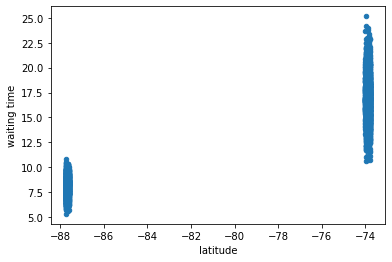

In [205]:
predictions.plot(
    kind='scatter',
    x='latitude', 
    y='waiting time',
);

We can see close up these are two clusters matching the original ranges and coordinates.

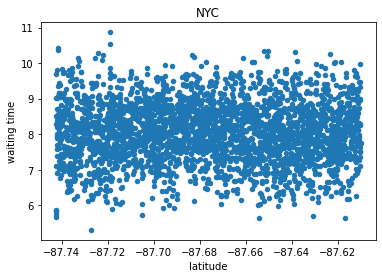

In [206]:
predictions[predictions.latitude < -80].plot(
    kind='scatter',
    x='latitude', 
    y='waiting time',
    title="NYC"
);

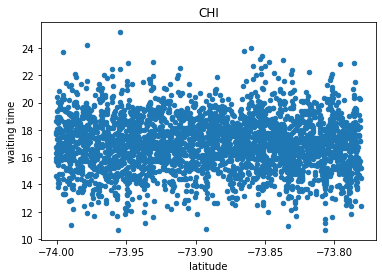

In [207]:
predictions[predictions.latitude > -80].plot(
    kind='scatter',
    x='latitude', 
    y='waiting time',
    title='CHI'
);

We hope to use substantial data and expand on the prediction with a more accurate model to further benefit the Parking Pal app users.